# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = load_diabetes()

In [3]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# Train Test Split

In [4]:
X = df.data
y = df.target

In [5]:
X.shape, y.shape

((442, 10), (442,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

# Linear Regression

In [8]:
lr = LinearRegression()

## Fit the model

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

## Prediction on test data

In [10]:
y_pred = lr.predict(X_test)

## Regression Metrics

### MAE

In [11]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  42.79409467959993


### MSE

In [12]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Mean Squared Error:  2900.1936284934804


### RMSE

In [13]:
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error:  53.85344583676592


### R2 Score

In [14]:
print('R2 Score using Linear Regression: ', r2_score(y_test, y_pred))

R2 Score using Linear Regression:  0.4526027629719196


## Coefficients and Intercept

In [15]:
print('Coefficients: ', lr.coef_)

Coefficients:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [16]:
print('Intercept: ', lr.intercept_)

Intercept:  151.34560453985995


# Ridge Regression

In [17]:
ridge = Ridge(alpha=0.01)

## Fit the model

In [18]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

## Prediction on test data

In [19]:
y_pred = ridge.predict(X_test)

## Regression Metrics

### MAE

In [20]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  42.83688767609176


### MSE

In [21]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Mean Squared Error:  2882.29018040601


### RMSE

In [22]:
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error:  53.68696471589738


### R2 Score

In [23]:
print('R2 score using Ridge Regression: ', r2_score(y_test, y_pred))

R2 score using Ridge Regression:  0.4559819504579109


## Coefficients and Intercept

In [24]:
print('Coefficients: ', ridge.coef_)

Coefficients:  [  40.69342168 -237.00801965  546.16179161  341.80931747 -430.14629956
  129.902301    -60.46081734  203.99084244  541.09802519   55.48255303]


In [25]:
print('Intercept: ', ridge.intercept_)

Intercept:  151.3365966317254


# Ridge Regression for non-linear data

In [26]:
x1 = 5 * np.random.rand(100, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(100, 1)

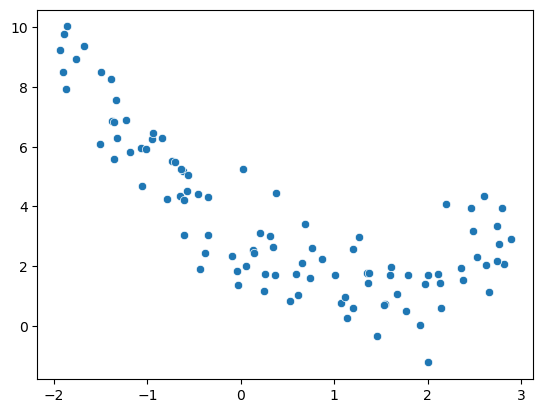

In [27]:
sns.scatterplot(x=x1[:, 0], y=x2[:, 0]);

In [28]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline(
        steps=[
            ('poly_feats', PolynomialFeatures(degree=16)),
            ('ridge', Ridge(alpha=alpha))
        ]
    )
    model.fit(x1, x2)
    return model.predict(x1)

In [29]:
alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

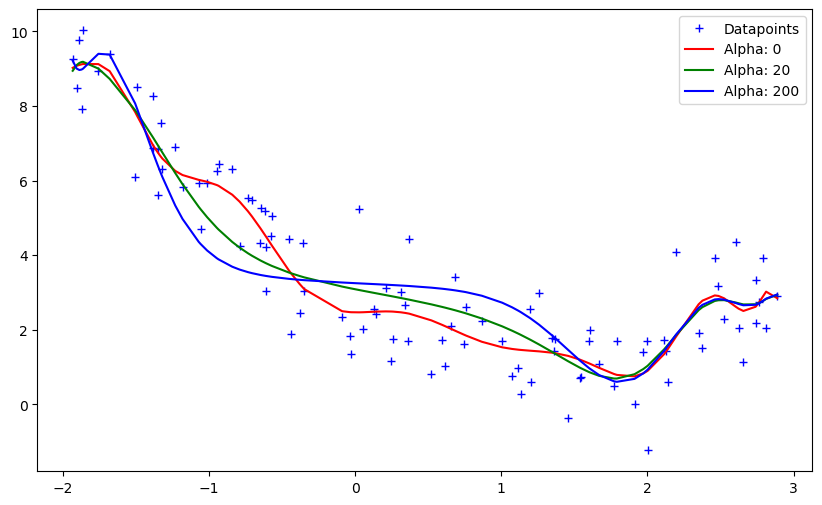

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

* Red line (alpha = 0) - Over Fitting
* Blue line (alpha = 100) - Under Fitting
* Green line (alpha = 20) - Neither over fitting nor under fitting

# Ridge Regression using RidgeCV 

In [31]:
ridgeCV = RidgeCV()

## Fit the model

In [32]:
ridgeCV.fit(X_train, y_train)

RidgeCV()

## Prediction on test data

In [33]:
y_pred = ridgeCV.predict(X_test)

### Regression Metrics

### MAE

In [34]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  42.996932141596545


### MSE

In [35]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Mean Squared Error:  2856.486887670656


### RMSE

In [36]:
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error:  53.44611199769967


### R2 Score

In [37]:
print('R2 score using RidgeCV: ', r2_score(y_test, y_pred))

R2 score using RidgeCV:  0.4608521946411922


## Coefficients and Intercept

In [38]:
print('Coefficients: ', ridgeCV.coef_)

Coefficients:  [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]


In [39]:
print('Intercept: ', ridgeCV.intercept_)

Intercept:  151.4585745667961


## Alphas and best alpha

In [40]:
print('Alphas: ', ridgeCV.alphas)

Alphas:  (0.1, 1.0, 10.0)


In [41]:
print('Alpha: ', ridgeCV.alpha_)

Alpha:  0.1
